### Libraries

In [1]:
import numpy as np
import pandas as pd
import requests
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()

### Helper Functions

In [2]:
def get_average(state_name, col_name):
    data_state = pd.read_csv('https://api.covidtracking.com/v1/states/' + state_name +'/daily.csv')
    var = pd.DataFrame(data_state[col_name])
    days = []
    for i in range(var.size, 0, -1):
        days.append(i)

    var.insert(0, 'days', days)
    average_sum = 0
    for i in range(0, var[col_name].size):
        average_sum += var[col_name][i];
    
    return (average_sum/var[col_name].size)    

# COVID-19 Dataset for USA

In [3]:
x = requests.get('https://api.covidtracking.com/v1/us/daily.csv')
data_us = pd.read_csv('https://api.covidtracking.com/v1/us/daily.csv')
data_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      420 non-null    int64  
 1   states                    420 non-null    int64  
 2   positive                  419 non-null    float64
 3   negative                  372 non-null    float64
 4   pending                   369 non-null    float64
 5   hospitalizedCurrently     356 non-null    float64
 6   hospitalizedCumulative    369 non-null    float64
 7   inIcuCurrently            347 non-null    float64
 8   inIcuCumulative           348 non-null    float64
 9   onVentilatorCurrently     348 non-null    float64
 10  onVentilatorCumulative    341 non-null    float64
 11  dateChecked               420 non-null    object 
 12  death                     392 non-null    float64
 13  hospitalized              369 non-null    float64
 14  totalTestR

In [4]:
data_us

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756489.0,74582825.0,11808.0,40199.0,878613.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,NaN,0,0,842,726,131835,41835,1170059,5468834088e2fb08a860dda6178a1faabe61edce
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,877887.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,NaN,0,0,1680,503,143835,60015,1430992,21a596203ad2c78f4e54d1e69967caf126a2a5a7
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,877384.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,NaN,0,0,2221,2781,271917,68787,1744417,a35ea4289cec4bb55c9f29ae04ec0fd5ac4e0222
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,874603.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,NaN,0,0,1743,1530,177957,65487,1590984,a19ad6379a653834cbda3093791ad2c3b9fab5ff
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,873073.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,NaN,0,0,2449,2172,267001,66836,1406795,9e1d2afda1b0ec243060d6f68a7134d011c0cb2a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,20200117,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-17T24:00:00Z,NaN,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6
416,20200116,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-16T24:00:00Z,NaN,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d
417,20200115,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-15T24:00:00Z,NaN,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047
418,20200114,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-14T24:00:00Z,NaN,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8


For death and cases increase in USA with day 0 starting at date 20200308 :


<AxesSubplot:xlabel='days', ylabel='positiveIncrease'>

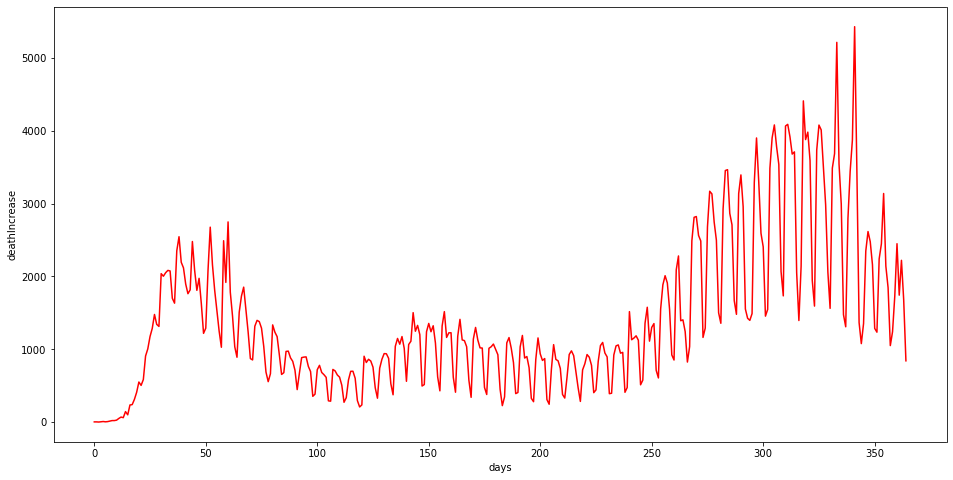

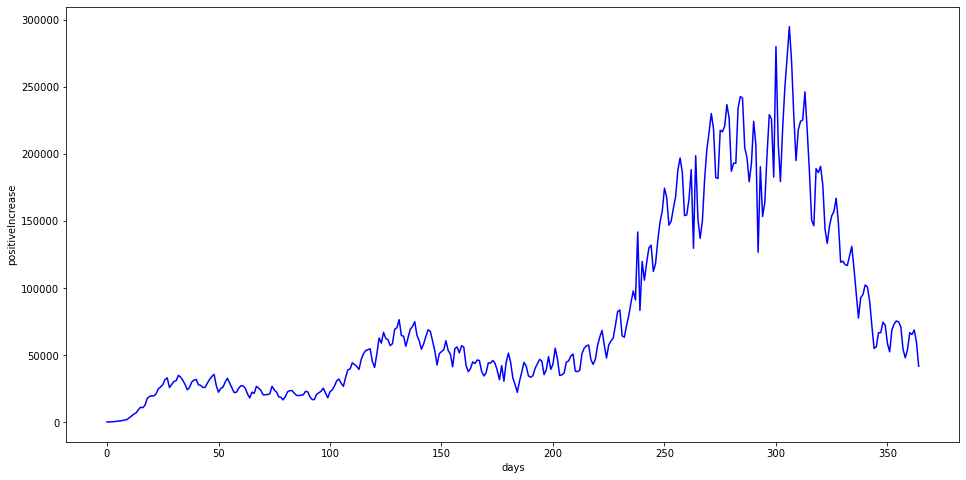

In [5]:
death = pd.DataFrame(data_us['deathIncrease'])
death = death.iloc[0:365]
cases = pd.DataFrame(data_us['positiveIncrease'])
cases = cases.iloc[0:365]
date = pd.DataFrame(data_us['date'])
date = date.iloc[0:365]
days = []

for i in range(364, -1, -1):
    days.append(i)

death.insert(0, 'days', days)
cases.insert(0, 'days', days)

print("For death and cases increase in USA with day 0 starting at date", date['date'][364], ":")

f = plt.figure(figsize=(16,8))
sb.lineplot(data = death, x ='days', y ='deathIncrease', color='red')

f = plt.figure(figsize=(16,8))
sb.lineplot(data = cases, x ='days', y ='positiveIncrease', color='blue')

# States Dataset Exploration

### Getting States Names

In [6]:
state_names = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States')
state_names = state_names[0]
state_names = state_names.iloc[:,[0,1]]
state_names = state_names['Flag, name andpostal abbreviation[12]']
state_names = state_names.set_index('Flag, name andpostal abbreviation[12]')
state_names = state_names.to_dict()['Flag, name andpostal abbreviation[12].1']

removal_list = []
for key,value in state_names.items():
    state_names[key] = value.lower()
    if(key[-1] == ']'):
        removal_list.append(key)
        
for i in removal_list:
    value = state_names[i]
    state_names.pop(i)
    state_names[i[:-3]] = value
    
state_names

{'Alabama': 'al',
 'Alaska': 'ak',
 'Arizona': 'az',
 'Arkansas': 'ar',
 'California': 'ca',
 'Colorado': 'co',
 'Connecticut': 'ct',
 'Delaware': 'de',
 'Florida': 'fl',
 'Georgia': 'ga',
 'Hawaii': 'hi',
 'Idaho': 'id',
 'Illinois': 'il',
 'Indiana': 'in',
 'Iowa': 'ia',
 'Kansas': 'ks',
 'Louisiana': 'la',
 'Maine': 'me',
 'Maryland': 'md',
 'Michigan': 'mi',
 'Minnesota': 'mn',
 'Mississippi': 'ms',
 'Missouri': 'mo',
 'Montana': 'mt',
 'Nebraska': 'ne',
 'Nevada': 'nv',
 'New Hampshire': 'nh',
 'New Jersey': 'nj',
 'New Mexico': 'nm',
 'New York': 'ny',
 'North Carolina': 'nc',
 'North Dakota': 'nd',
 'Ohio': 'oh',
 'Oklahoma': 'ok',
 'Oregon': 'or',
 'Rhode Island': 'ri',
 'South Carolina': 'sc',
 'South Dakota': 'sd',
 'Tennessee': 'tn',
 'Texas': 'tx',
 'Utah': 'ut',
 'Vermont': 'vt',
 'Washington': 'wa',
 'West Virginia': 'wv',
 'Wisconsin': 'wi',
 'Wyoming': 'wy',
 'Kentucky': 'ky',
 'Massachusetts': 'ma',
 'Pennsylvania': 'pa',
 'Virginia': 'va'}

### Flexible variable for data exploration

In [7]:
var = 'positiveIncrease' #No of COVID cases per day, extract from dataset
#'deathIncrease' 'recovered'
variable = 'Positive Increase per 1m Capita' #Name to be presented in cleaned dataset

In [8]:
avgVar_dict = {}
for name in state_names.keys():
    avgVar_dict[name] = get_average(state_names[name], var)

avgVar_dict

{'Alabama': 1365.6256830601094,
 'Alaska': 155.00272479564032,
 'Arizona': 2239.7073170731705,
 'Arkansas': 885.0626702997275,
 'California': 9488.728997289973,
 'Colorado': 1183.1978319783198,
 'Connecticut': 764.9597855227883,
 'Delaware': 240.7465940054496,
 'Florida': 4725.764851485149,
 'Georgia': 2773.6720867208674,
 'Hawaii': 77.77506775067751,
 'Idaho': 472.4890710382514,
 'Illinois': 3247.509485094851,
 'Indiana': 1779.3653333333334,
 'Iowa': 769.4386920980926,
 'Kansas': 806.1607629427793,
 'Louisiana': 1185.204918032787,
 'Maine': 125.12021857923497,
 'Maryland': 1052.4972826086957,
 'Michigan': 1763.5967741935483,
 'Minnesota': 1335.1771117166213,
 'Mississippi': 813.0628415300547,
 'Missouri': 1313.2322404371585,
 'Montana': 275.72131147540983,
 'Nebraska': 524.6149870801033,
 'Nevada': 804.8614130434783,
 'New Hampshire': 208.289972899729,
 'New Jersey': 2072.9821428571427,
 'New Mexico': 507.9402173913044,
 'New York': 4531.452830188679,
 'North Carolina': 2363.617886178

## Population Data

In [9]:
population_import = pd.read_excel('population_data.xlsx')
p_st = list(population_import.iloc[8:59, 0])
population_import = list(population_import.iloc[8:59, 12])

pst_list = []
for n in p_st:
    pst_list.append(n[1:])    
p_st = pd.DataFrame(pst_list)
p_st = p_st.rename(columns={0:'states'})

population_import = pd.DataFrame(population_import)
population_import = pd.concat([p_st, population_import], axis=1)
population = list(population_import.set_index('states').to_dict().values())[0]
population

{'Alabama': 4903185.0,
 'Alaska': 731545.0,
 'Arizona': 7278717.0,
 'Arkansas': 3017804.0,
 'California': 39512223.0,
 'Colorado': 5758736.0,
 'Connecticut': 3565287.0,
 'Delaware': 973764.0,
 'District of Columbia': 705749.0,
 'Florida': 21477737.0,
 'Georgia': 10617423.0,
 'Hawaii': 1415872.0,
 'Idaho': 1787065.0,
 'Illinois': 12671821.0,
 'Indiana': 6732219.0,
 'Iowa': 3155070.0,
 'Kansas': 2913314.0,
 'Kentucky': 4467673.0,
 'Louisiana': 4648794.0,
 'Maine': 1344212.0,
 'Maryland': 6045680.0,
 'Massachusetts': 6892503.0,
 'Michigan': 9986857.0,
 'Minnesota': 5639632.0,
 'Mississippi': 2976149.0,
 'Missouri': 6137428.0,
 'Montana': 1068778.0,
 'Nebraska': 1934408.0,
 'Nevada': 3080156.0,
 'New Hampshire': 1359711.0,
 'New Jersey': 8882190.0,
 'New Mexico': 2096829.0,
 'New York': 19453561.0,
 'North Carolina': 10488084.0,
 'North Dakota': 762062.0,
 'Ohio': 11689100.0,
 'Oklahoma': 3956971.0,
 'Oregon': 4217737.0,
 'Pennsylvania': 12801989.0,
 'Rhode Island': 1059361.0,
 'South Caro

### Flexible Variable Average Increase Per Capita

In [10]:
for i in avgVar_dict.keys():
    avgVar_dict[i] = int(avgVar_dict[i])/int(population[i])*1000000

avgVar_dict #In this case, average number of covid increase per day per 1 million capita.

{'Alabama': 278.3904747628327,
 'Alaska': 211.88033545441496,
 'Arizona': 307.60915694345584,
 'Arkansas': 293.2596020152402,
 'California': 240.12822563792474,
 'Colorado': 205.42702426365787,
 'Connecticut': 214.28849907454855,
 'Delaware': 246.4662895732436,
 'Florida': 219.99524437793423,
 'Georgia': 261.1744865020448,
 'Hawaii': 54.38344709126249,
 'Idaho': 264.1202194659959,
 'Illinois': 256.2378366929268,
 'Indiana': 264.25165313249613,
 'Iowa': 243.73468734449634,
 'Kansas': 276.6608748662176,
 'Louisiana': 254.9048204760202,
 'Maine': 92.99128411292266,
 'Maryland': 174.0085482526366,
 'Michigan': 176.53201602866648,
 'Minnesota': 236.7175730615047,
 'Mississippi': 273.1718069223013,
 'Missouri': 213.933263249687,
 'Montana': 257.30320047755475,
 'Nebraska': 270.8839086686986,
 'Nevada': 261.0257402547144,
 'New Hampshire': 152.97368337830613,
 'New Jersey': 233.27580247664147,
 'New Mexico': 241.7936798851981,
 'New York': 232.91365524286275,
 'North Carolina': 225.3033061138

In [11]:
state_data = pd.DataFrame.from_dict(avgVar_dict, orient='index')
state_data = state_data.rename(columns={0:variable})
state_data.head()

,Positive Increase per 1m Capita
Alabama,278.390475
Alaska,211.880335
Arizona,307.609157
Arkansas,293.259602
California,240.128226


<AxesSubplot:ylabel='States'>

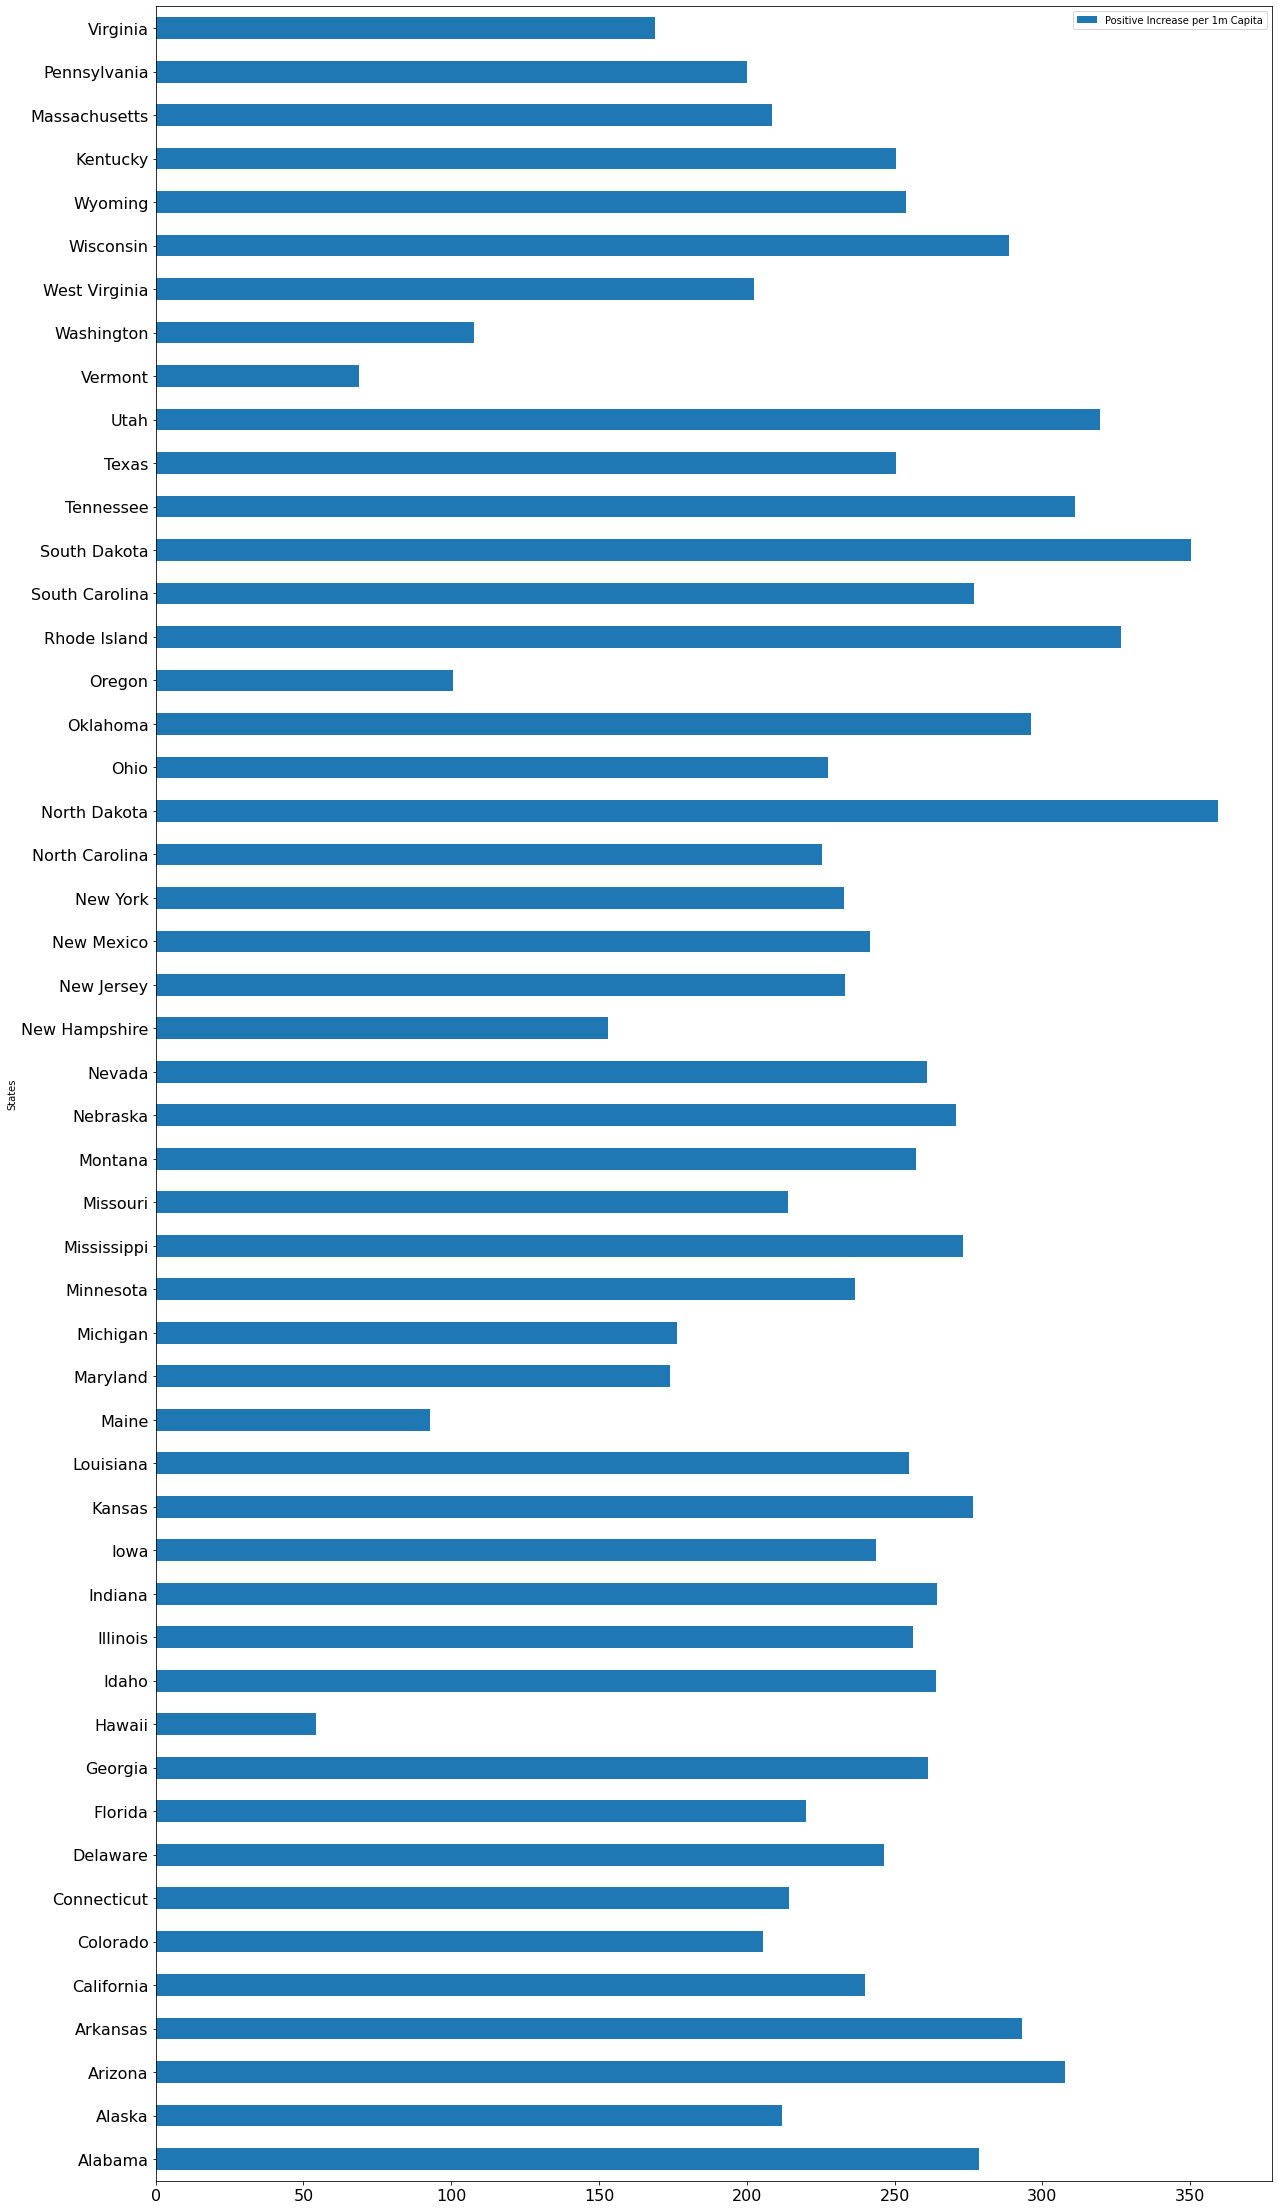

In [12]:
state_data.plot.barh(figsize=(20,40), fontsize=16, xlabel='States')

# Uni-Variate Data for Diversity Index

In [13]:
race_data = pd.read_csv('Ethnicity Data.csv')
race_data.info()

race_data = race_data.set_index('Location')
race_data = race_data.iloc[:,[8]]

combined_race_data = state_data.merge(race_data, left_index = True, right_index = True)
combined_race_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Location                                53 non-null     object 
 1   White                                   53 non-null     float64
 2   Black                                   53 non-null     float64
 3   Hispanic                                53 non-null     float64
 4   Asian                                   52 non-null     float64
 5   American Indian/Alaska Native           51 non-null     float64
 6   Native Hawaiian/Other Pacific Islander  22 non-null     object 
 7   Multiple Races                          53 non-null     float64
 8   Total                                   53 non-null     int64  
 9   Diversity by Simpson Index              53 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.3+ KB


,Positive Increase per 1m Capita,Diversity by Simpson Index
Alabama,278.390475,0.500450
Alaska,211.880335,0.398899
Arizona,307.609157,0.399927
Arkansas,293.259602,0.549913
California,240.128226,0.314060
Colorado,205.427024,0.510486
Connecticut,214.288499,0.473006
Delaware,246.466290,0.436243
Florida,219.995244,0.375466
Georgia,261.174487,0.380284


,Positive Increase per 1m Capita,Diversity by Simpson Index
Positive Increase per 1m Capita,1.000000,-0.043037
Diversity by Simpson Index,-0.043037,1.000000


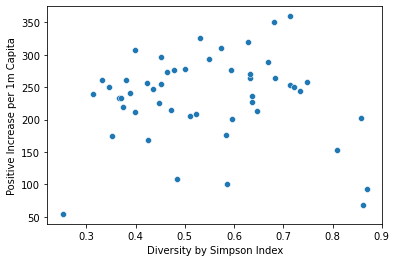

In [14]:
sb.scatterplot(data=combined_race_data,x = 'Diversity by Simpson Index' ,y = variable)
combined_race_data.corr()

Intercept of Regression 	: b =  [247.28600798]
Coefficients of Regression 	: a =  [[-30.92608963]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.004428120519812673
Mean Squared Error (MSE) 	: 5200.2465532768665

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.1308358134232479
Mean Squared Error (MSE) 	: 1963.125023303967



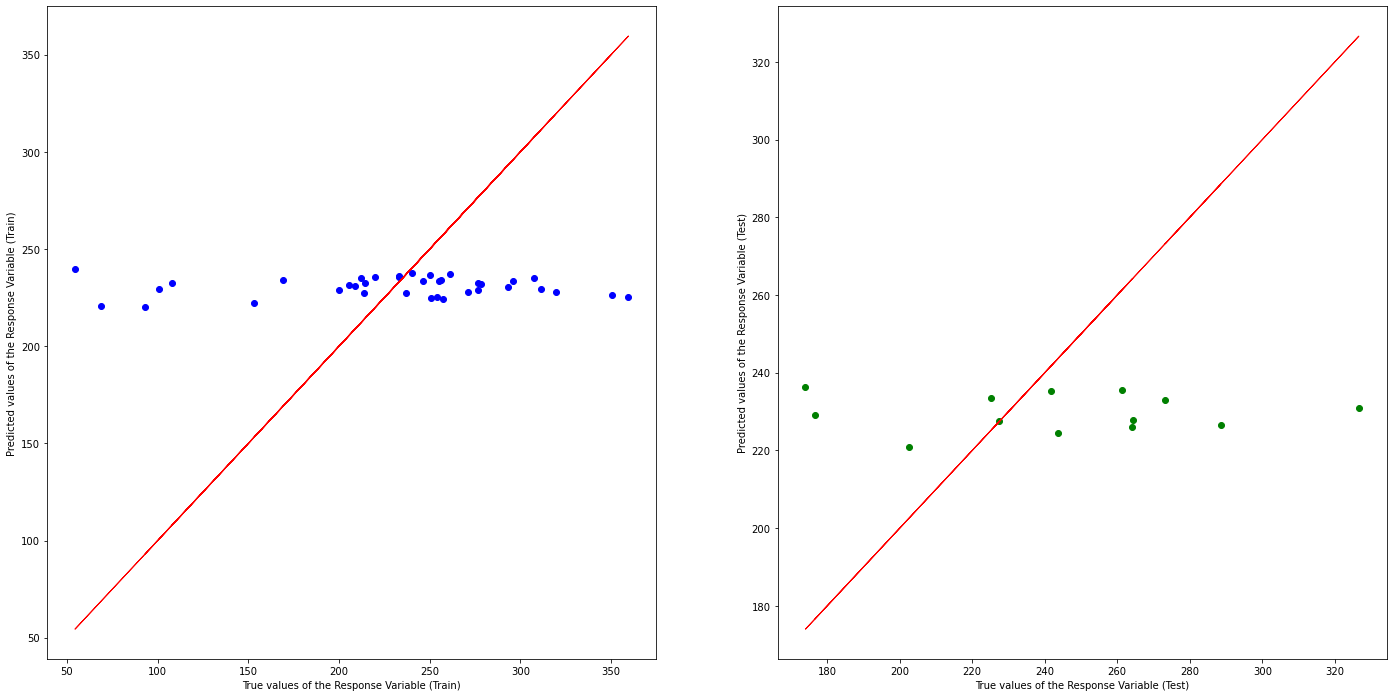

In [15]:
Race = pd.DataFrame(combined_race_data['Diversity by Simpson Index']) 
Deaths = pd.DataFrame(combined_race_data[variable]) 

X_train, X_test, y_train, y_test = train_test_split(Race,Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

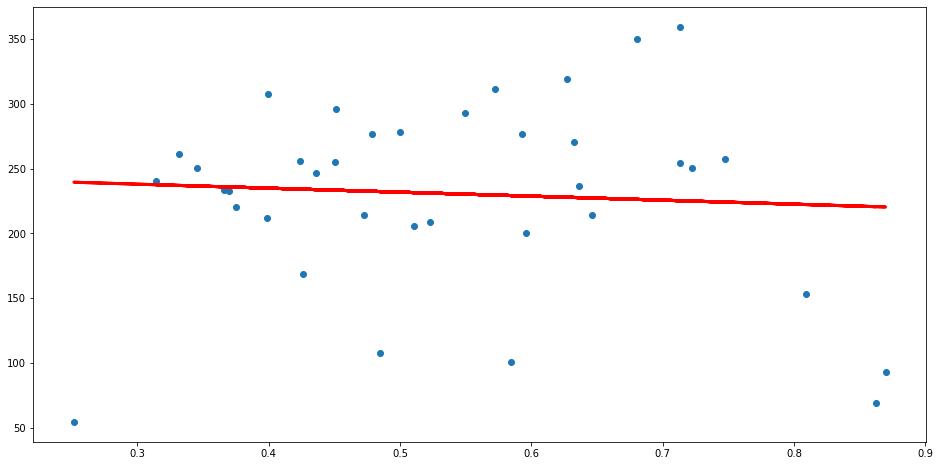

In [16]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Uni-Variate for % of Smokers per State

In [17]:
tobacco_data = pd.read_csv('Cigarette_use_USA.csv')
tobacco_data.info()

tobacco_data = tobacco_data.set_index('Location')
tobacco_data = tobacco_data.iloc[:,[0]]

combined_tobacco_data = state_data.merge(tobacco_data, left_index = True, right_index = True)
combined_tobacco_data = combined_tobacco_data.rename(columns={'Data_Value':'% of Smokers'})
combined_tobacco_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               50 non-null     object 
 1   Data_Value             50 non-null     float64
 2   Low_Confidence_Limit   50 non-null     float64
 3   High_Confidence_Limit  50 non-null     float64
 4   Sample_Size            50 non-null     object 
dtypes: float64(3), object(2)
memory usage: 2.1+ KB


,Positive Increase per 1m Capita,% of Smokers
Alabama,278.390475,19.2
Alaska,211.880335,19.1
Arizona,307.609157,14.0
Arkansas,293.259602,22.7
California,240.128226,11.2
Colorado,205.427024,14.5
Connecticut,214.288499,12.2
Delaware,246.466290,16.5
Florida,219.995244,14.5
Georgia,261.174487,16.1


,Positive Increase per 1m Capita,% of Smokers
Positive Increase per 1m Capita,1.000000,0.249402
% of Smokers,0.249402,1.000000


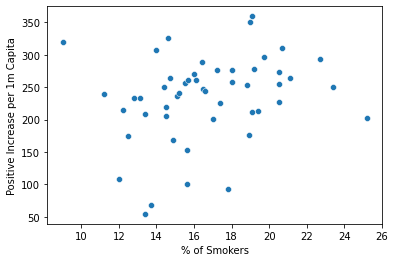

In [18]:
sb.scatterplot(data=combined_tobacco_data,x = '% of Smokers' ,y = variable)
combined_tobacco_data.corr()

Intercept of Regression 	: b =  [119.15205888]
Coefficients of Regression 	: a =  [[6.8726406]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.09036309517941221
Mean Squared Error (MSE) 	: 4633.187519921391

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.19060315167393527
Mean Squared Error (MSE) 	: 2646.883936372028



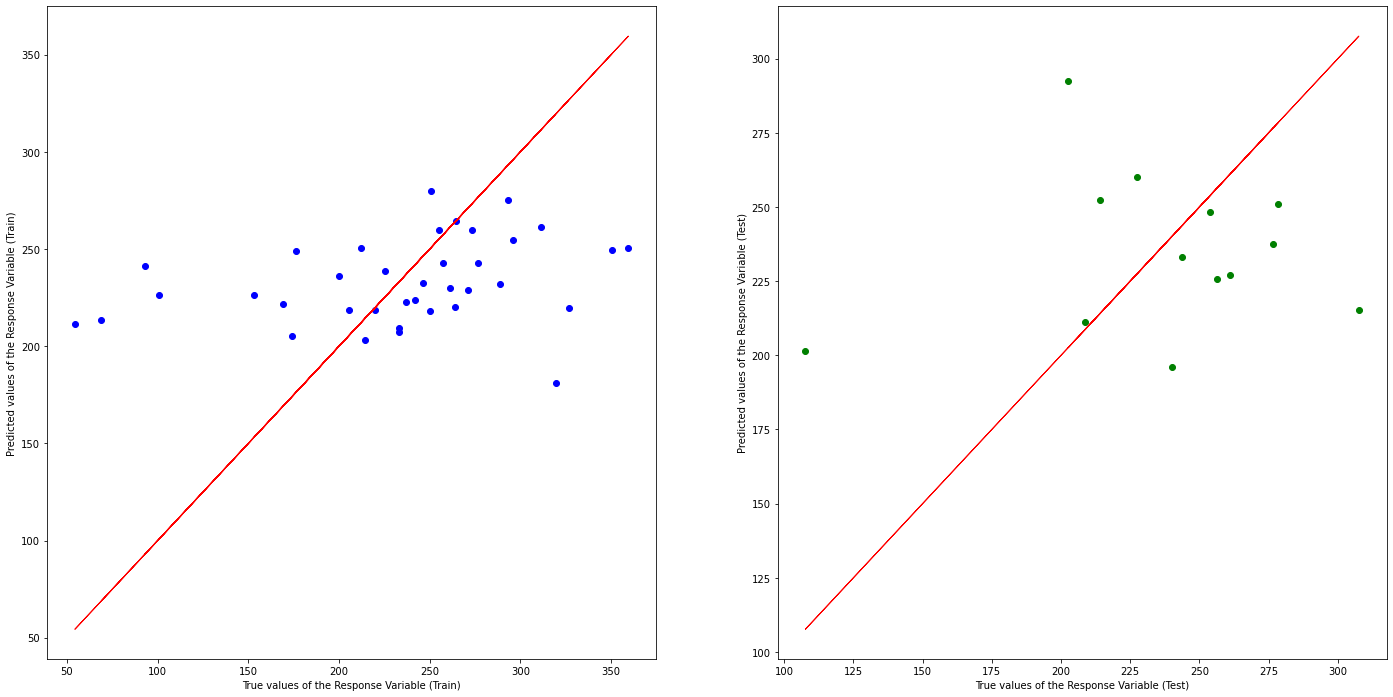

In [19]:
Smokers = pd.DataFrame(combined_tobacco_data['% of Smokers'])   # Response
Deaths = pd.DataFrame(combined_tobacco_data[variable]) 

X_train, X_test, y_train, y_test = train_test_split(Smokers, Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

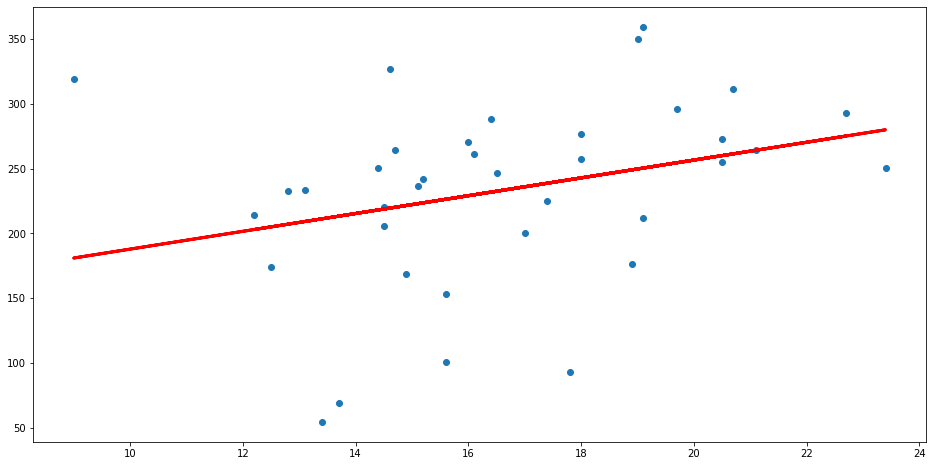

In [20]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Average Temperature per State per Year

In [21]:
data_temp = pd.read_csv("American Temp.csv")
data_temp.info()
data_temp = data_temp.set_index('Location')

combined_data_temp = state_data.merge(data_temp, left_index = True, right_index = True)
combined_data_temp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   50 non-null     object 
 1   Ferenheit  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 928.0+ bytes


,Positive Increase per 1m Capita,Ferenheit
Alabama,278.390475,62.8
Alaska,211.880335,26.6
Arizona,307.609157,60.3
Arkansas,293.259602,60.4
California,240.128226,59.4
Colorado,205.427024,45.1
Connecticut,214.288499,49.0
Delaware,246.466290,55.3
Florida,219.995244,70.7
Georgia,261.174487,63.5


,Positive Increase per 1m Capita,Ferenheit
Positive Increase per 1m Capita,1.00000,0.09052
Ferenheit,0.09052,1.00000


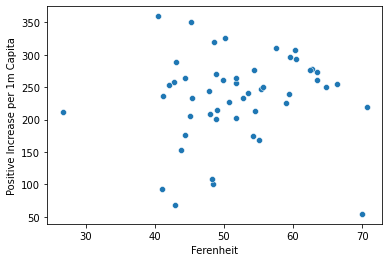

In [22]:
sb.scatterplot(data=combined_data_temp,x = 'Ferenheit' ,y = variable)
combined_data_temp.corr()

Intercept of Regression 	: b =  [106.93949759]
Coefficients of Regression 	: a =  [[2.59538368]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.13159468580558065
Mean Squared Error (MSE) 	: 2882.2057637411767

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.3632826020619986
Mean Squared Error (MSE) 	: 9649.855891628727



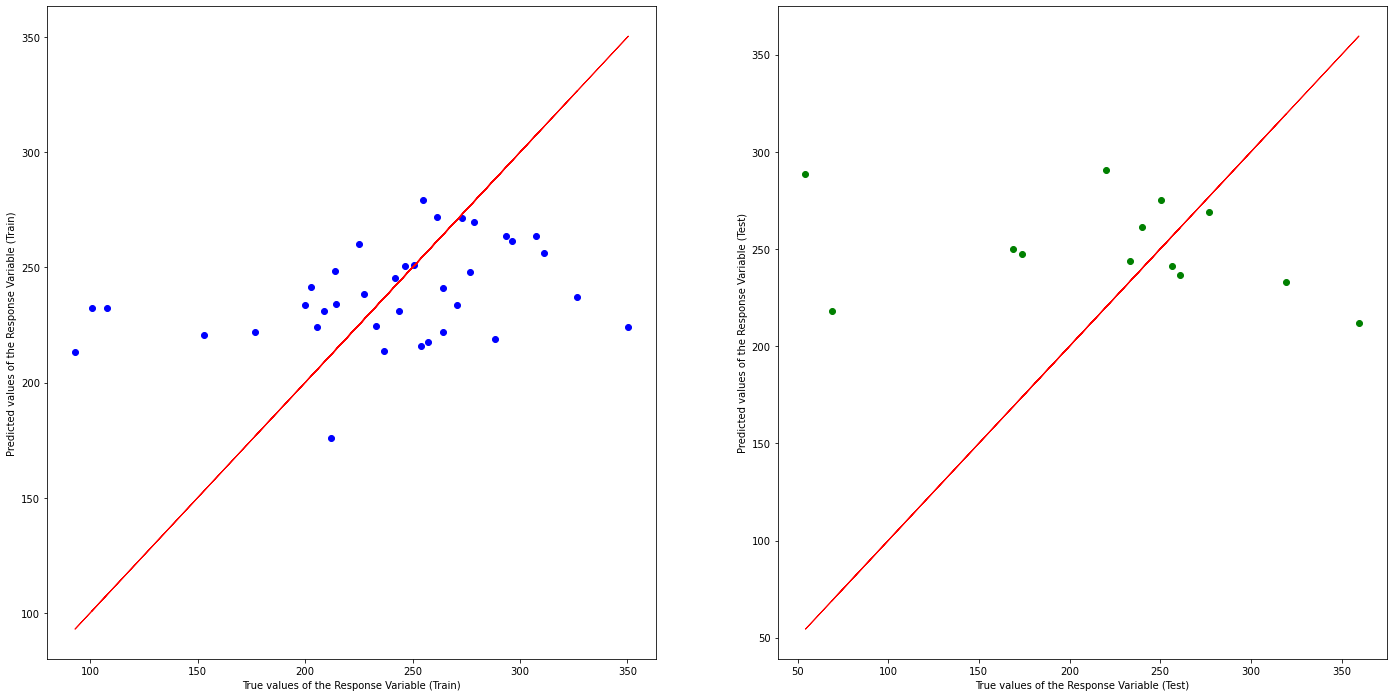

In [23]:
Ferenheit = pd.DataFrame(combined_data_temp['Ferenheit'])   # Response
Deaths = pd.DataFrame(combined_data_temp[variable]) 

X_train, X_test, y_train, y_test = train_test_split(Ferenheit,Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

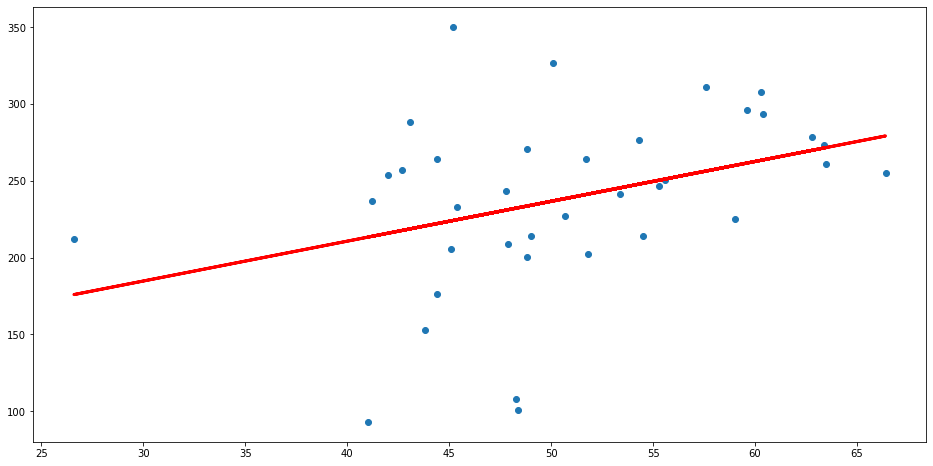

In [24]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Uni-Variate Inpatient Expense

In [25]:
expenses_data = pd.read_csv("expenses_data.csv")
expenses_data.info()

expenses_data = expenses_data.set_index('Location')
expenses_data = expenses_data.rename(columns={"Expenses per Inpatient Day":"Expenses"})

combined_data_expenses = state_data.merge(expenses_data, left_index = True, right_index = True)
combined_data_expenses

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Location                    52 non-null     object
 1   Expenses per Inpatient Day  52 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes


,Positive Increase per 1m Capita,Expenses
Alabama,278.390475,1657
Alaska,211.880335,2397
Arizona,307.609157,2751
Arkansas,293.259602,1883
California,240.128226,3726
Colorado,205.427024,3047
Connecticut,214.288499,2884
Delaware,246.466290,3141
Florida,219.995244,2366
Georgia,261.174487,1939


,Positive Increase per 1m Capita,Expenses
Positive Increase per 1m Capita,1.000000,-0.418294
Expenses,-0.418294,1.000000


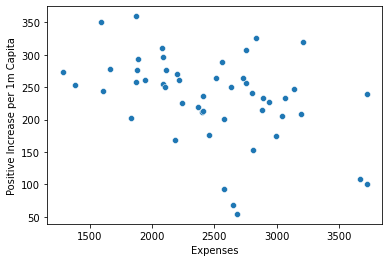

In [26]:
sb.scatterplot(data=combined_data_expenses,x = 'Expenses' ,y = variable)
combined_data_expenses.corr()

Intercept of Regression 	: b =  [343.50646767]
Coefficients of Regression 	: a =  [[-0.04533569]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.1630566718259856
Mean Squared Error (MSE) 	: 3663.4859043650463

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.1804753810476052
Mean Squared Error (MSE) 	: 3411.8005089274247



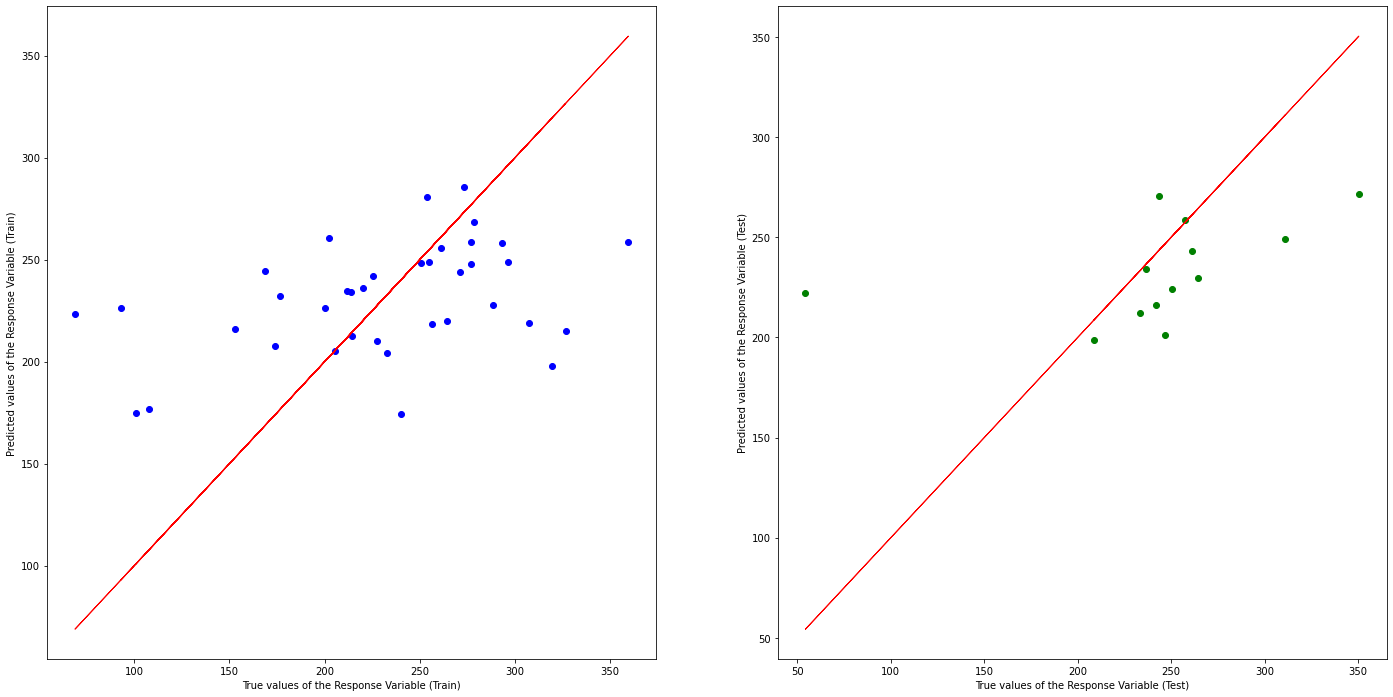

In [27]:
Expenses = pd.DataFrame(combined_data_expenses['Expenses'])   # Response
Deaths = pd.DataFrame(combined_data_expenses[variable]) 

X_train, X_test, y_train, y_test = train_test_split(Expenses,Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

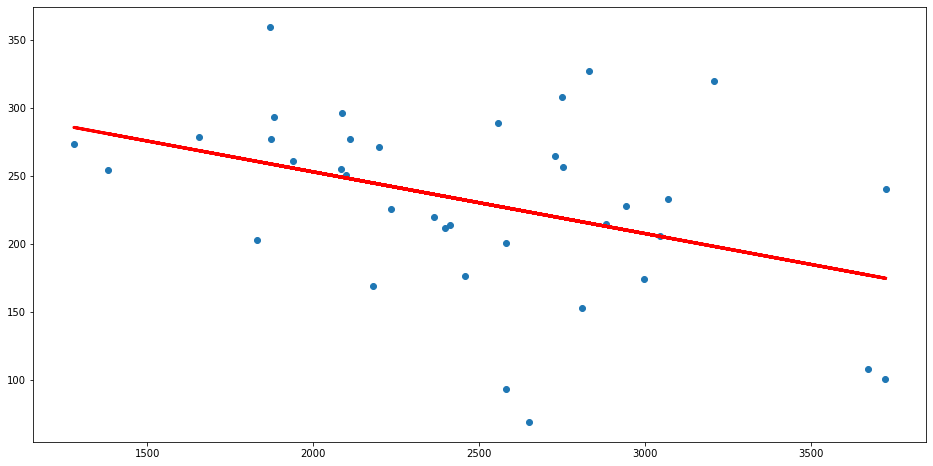

In [28]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Uni-Variate Demographic

In [29]:
age_data = pd.read_csv("age_data.csv")
age_data = age_data.set_index('Location')
age_data.info()

combined_data_age = state_data.merge(age_data, left_index = True, right_index = True)
combined_data_age

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, United States to Puerto Rico
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Children 0-18  53 non-null     float64
 1   Adults 19-25   53 non-null     float64
 2   Adults 26-34   53 non-null     float64
 3   Adults 35-54   53 non-null     float64
 4   Adults 55-64   53 non-null     float64
 5   65+            53 non-null     float64
 6   Total          53 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 3.3+ KB


,Positive Increase per 1m Capita,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total
Alabama,278.390475,0.237,0.087,0.115,0.251,0.135,0.175,1
Alaska,211.880335,0.259,0.093,0.139,0.246,0.132,0.130,1
Arizona,307.609157,0.240,0.093,0.121,0.241,0.124,0.182,1
Arkansas,293.259602,0.247,0.087,0.115,0.248,0.131,0.173,1
California,240.128226,0.237,0.092,0.137,0.263,0.123,0.149,1
Colorado,205.427024,0.231,0.089,0.141,0.265,0.126,0.148,1
Connecticut,214.288499,0.217,0.086,0.113,0.259,0.148,0.177,1
Delaware,246.466290,0.218,0.081,0.118,0.242,0.144,0.197,1
Florida,219.995244,0.209,0.080,0.114,0.249,0.137,0.211,1
Georgia,261.174487,0.253,0.089,0.122,0.267,0.125,0.145,1


<AxesSubplot:xlabel='Children 0-18', ylabel='Positive Increase per 1m Capita'>

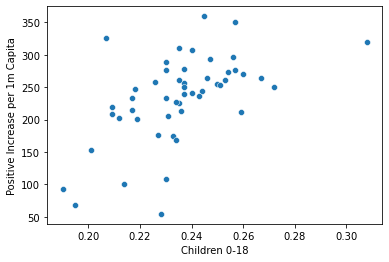

In [30]:
sb.scatterplot(data=combined_data_age,x = 'Children 0-18' ,y = variable)

<AxesSubplot:xlabel='Adults 19-25', ylabel='Positive Increase per 1m Capita'>

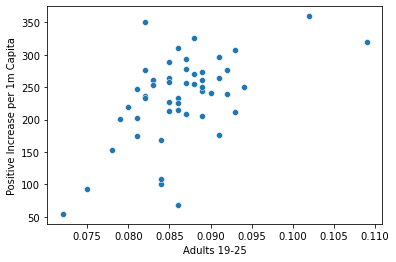

In [31]:
sb.scatterplot(data=combined_data_age,x = 'Adults 19-25' ,y = variable)

<AxesSubplot:xlabel='Adults 26-34', ylabel='Positive Increase per 1m Capita'>

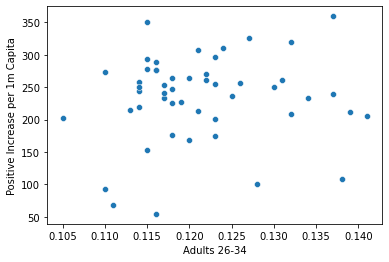

In [32]:
sb.scatterplot(data=combined_data_age,x = 'Adults 26-34' ,y = variable)

<AxesSubplot:xlabel='Adults 35-54', ylabel='Positive Increase per 1m Capita'>

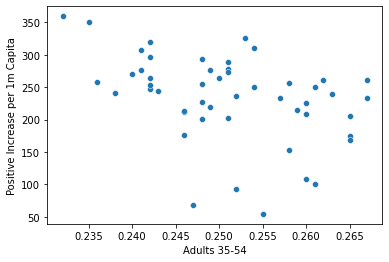

In [33]:
sb.scatterplot(data=combined_data_age,x = 'Adults 35-54' ,y = variable)

<AxesSubplot:xlabel='Adults 55-64', ylabel='Positive Increase per 1m Capita'>

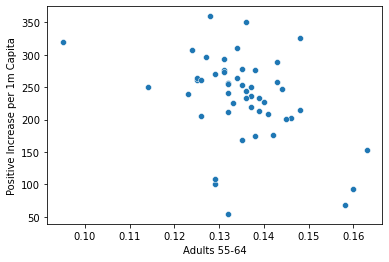

In [34]:
sb.scatterplot(data=combined_data_age,x = 'Adults 55-64' ,y = variable)

<AxesSubplot:xlabel='65+', ylabel='Positive Increase per 1m Capita'>

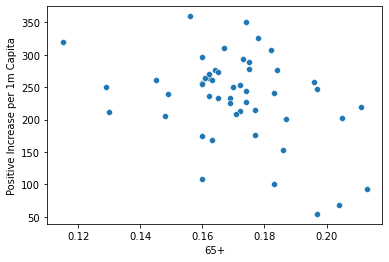

In [35]:
sb.scatterplot(data=combined_data_age,x = '65+' ,y = variable)

In [36]:
combined_data_age.corr()

,Positive Increase per 1m Capita,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total
Positive Increase per 1m Capita,1.000000,0.558675,0.544092,0.095936,-0.415212,-0.409360,-0.390556,NaN
Children 0-18,0.558675,1.000000,0.644512,0.249457,-0.291626,-0.834127,-0.777154,NaN
Adults 19-25,0.544092,0.644512,1.000000,0.435012,-0.276112,-0.654767,-0.691184,NaN
Adults 26-34,0.095936,0.249457,0.435012,1.000000,0.246643,-0.513557,-0.662831,NaN
Adults 35-54,-0.415212,-0.291626,-0.276112,0.246643,1.000000,0.028506,-0.183161,NaN
Adults 55-64,-0.409360,-0.834127,-0.654767,-0.513557,0.028506,1.000000,0.745593,NaN
65+,-0.390556,-0.777154,-0.691184,-0.662831,-0.183161,0.745593,1.000000,NaN
Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Intercept of Regression 	: b =  [-140.23374879]
Coefficients of Regression 	: a =  [[1594.97294489]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3205700680427601
Mean Squared Error (MSE) 	: 2830.765966057527

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2676546368720487
Mean Squared Error (MSE) 	: 3514.7194979251726



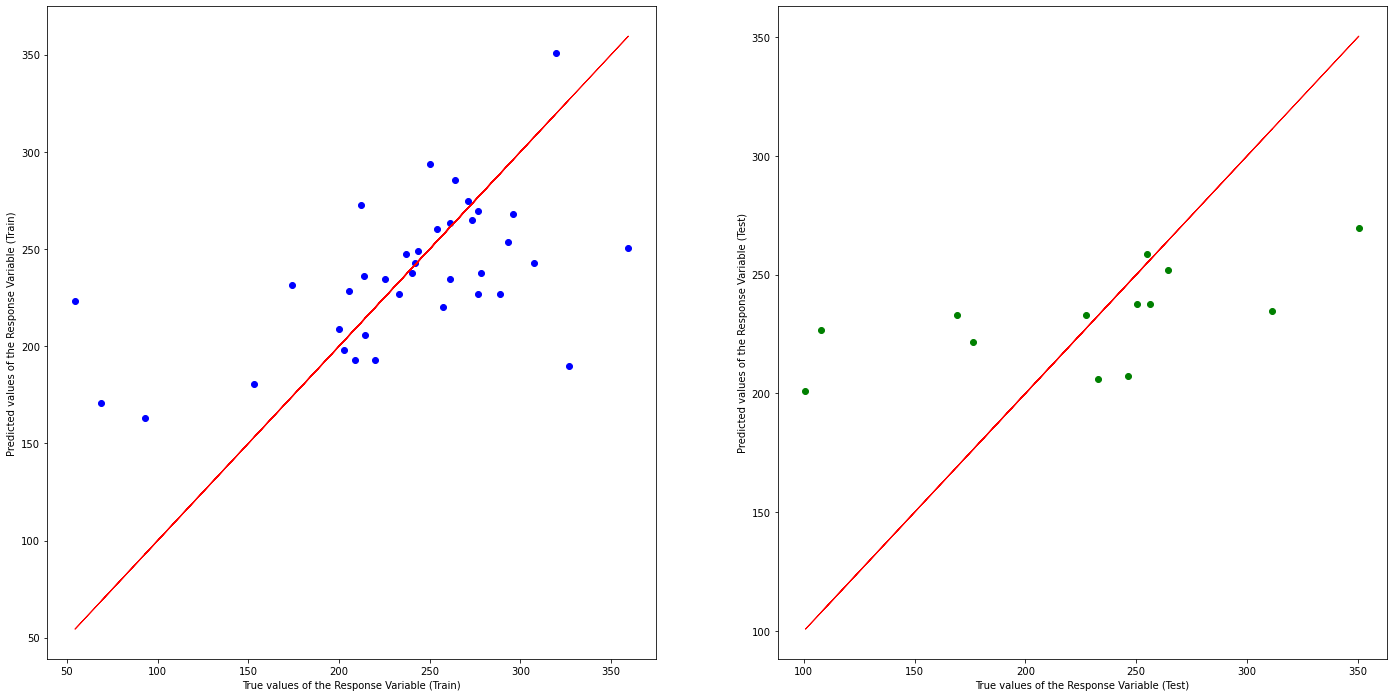

In [37]:
numberChildren = pd.DataFrame(combined_data_age['Children 0-18'])   # Response
Deaths = pd.DataFrame(combined_data_age[variable]) 

X_train, X_test, y_train, y_test = train_test_split(numberChildren,Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

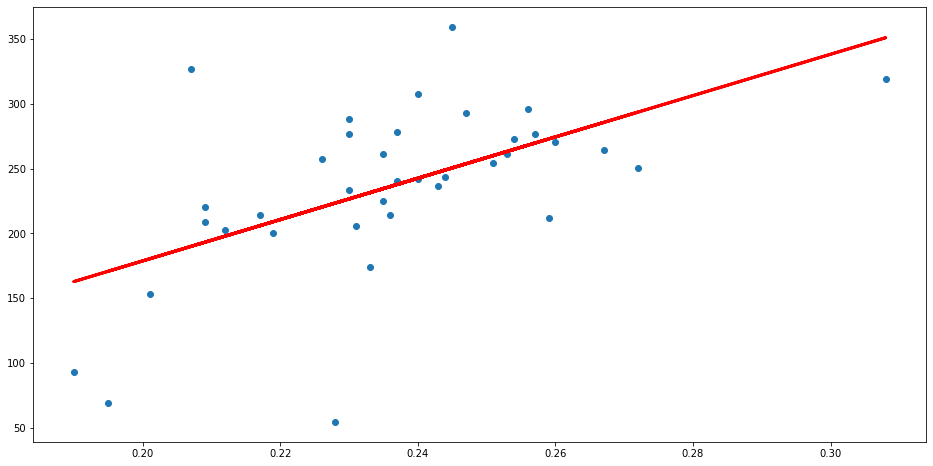

In [38]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Uni-Variate GDP per Capita

In [39]:
gdp = pd.read_csv('Current_GDP_US_States_2020_Annually.csv')
gdp = list(gdp.loc[1:, "GeoName":"2020"].set_index('GeoName').to_dict().values())[0]

gdp_state = {}
for i in avgVar_dict.keys():
    gdp_state[i] = int(gdp[i]*1000000 /population[i]) 

gdp_state = pd.DataFrame.from_dict(gdp_state, orient='index')
gdp_state = gdp_state.rename(columns={0:'GDP per Capita'})
gdp_state

,GDP per Capita
Alabama,45862
Alaska,68685
Arizona,51171
Arkansas,42770
California,78251
Colorado,67740
Connecticut,78787
Delaware,77547
Florida,51024
Georgia,58323


In [40]:
combined_data_gdp = state_data.merge(gdp_state, left_index = True, right_index = True)
combined_data_gdp = combined_data_gdp.rename(columns={0:variable})
combined_data_gdp

,Positive Increase per 1m Capita,GDP per Capita
Alabama,278.390475,45862
Alaska,211.880335,68685
Arizona,307.609157,51171
Arkansas,293.259602,42770
California,240.128226,78251
Colorado,205.427024,67740
Connecticut,214.288499,78787
Delaware,246.466290,77547
Florida,219.995244,51024
Georgia,261.174487,58323


,Positive Increase per 1m Capita,GDP per Capita
Positive Increase per 1m Capita,1.000000,-0.161434
GDP per Capita,-0.161434,1.000000


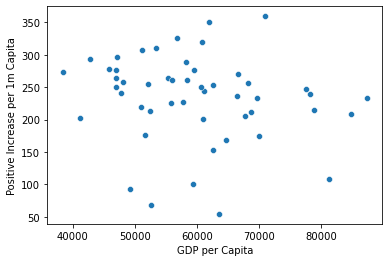

In [41]:
sb.scatterplot(data = combined_data_gdp, y = variable, x = 'GDP per Capita')
combined_data_gdp.corr()

Intercept of Regression 	: b =  [284.71375412]
Coefficients of Regression 	: a =  [[-0.00078371]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.020663494478001643
Mean Squared Error (MSE) 	: 3859.8677033483236

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.025571110684486253
Mean Squared Error (MSE) 	: 5380.40855009478



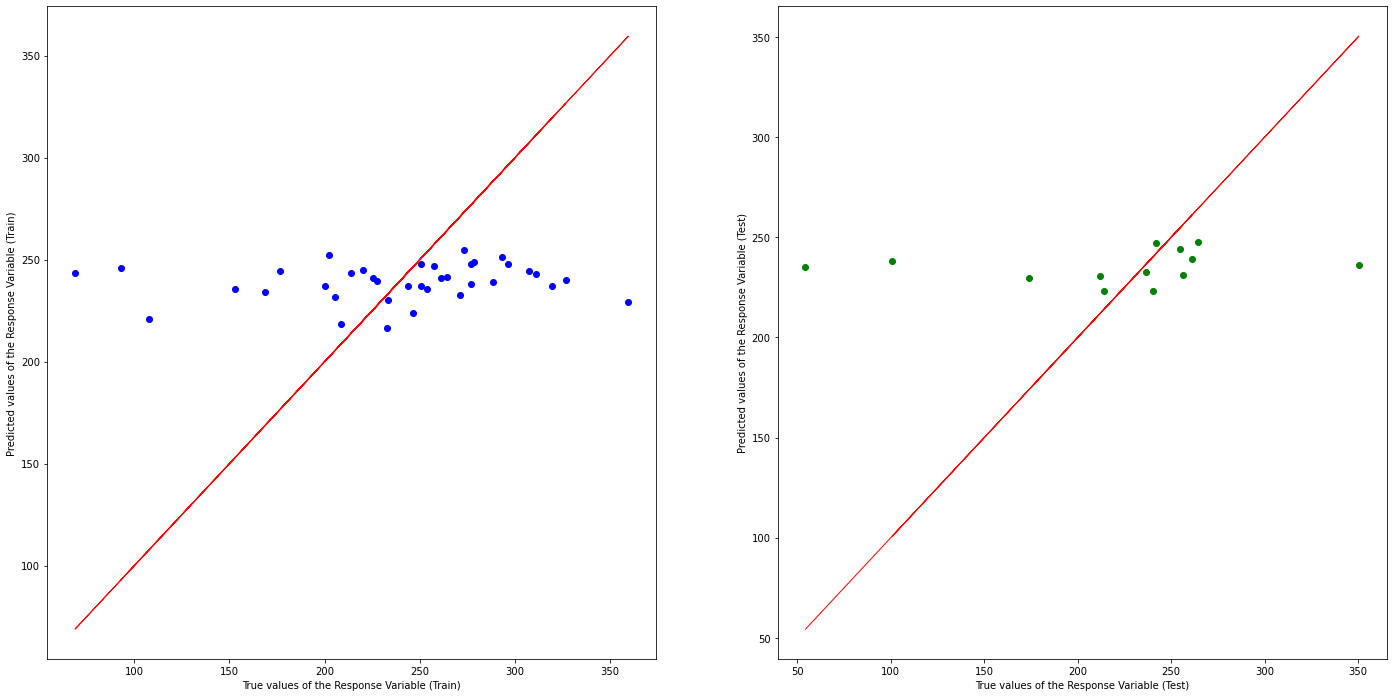

In [42]:
GDP = pd.DataFrame(combined_data_gdp['GDP per Capita'])   # Response
Deaths = pd.DataFrame(combined_data_gdp[variable]) 

X_train, X_test, y_train, y_test = train_test_split(GDP, Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

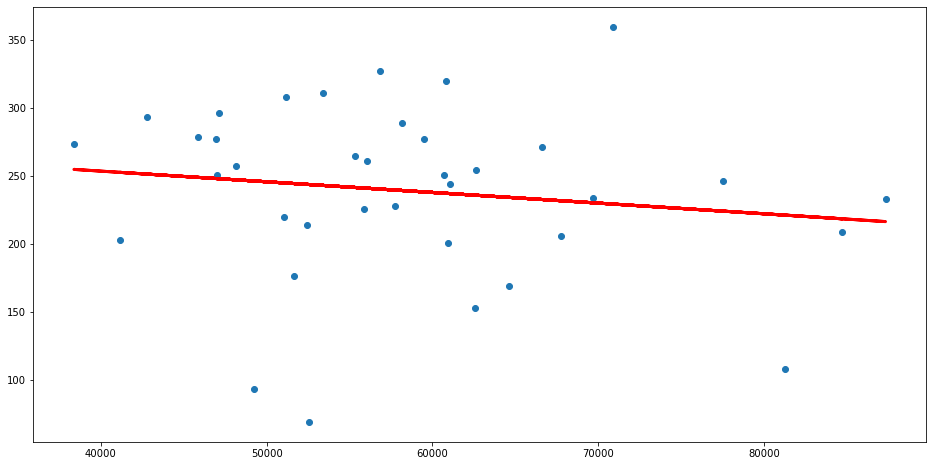

In [43]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Multi-Variate for all Values

In [44]:
combined_data = pd.concat([combined_race_data,
                        combined_tobacco_data,
                        combined_data_temp,
                        combined_data_expenses,
                        combined_data_gdp,
                        combined_data_age], axis=1)

combined_data = combined_data.loc[:,~combined_data.columns.duplicated()]
combined_data = combined_data.loc[:,:"65+"]
combined_data

,Positive Increase per 1m Capita,Diversity by Simpson Index,% of Smokers,Ferenheit,Expenses,GDP per Capita,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+
Alabama,278.390475,0.500450,19.2,62.8,1657,45862,0.237,0.087,0.115,0.251,0.135,0.175
Alaska,211.880335,0.398899,19.1,26.6,2397,68685,0.259,0.093,0.139,0.246,0.132,0.130
Arizona,307.609157,0.399927,14.0,60.3,2751,51171,0.240,0.093,0.121,0.241,0.124,0.182
Arkansas,293.259602,0.549913,22.7,60.4,1883,42770,0.247,0.087,0.115,0.248,0.131,0.173
California,240.128226,0.314060,11.2,59.4,3726,78251,0.237,0.092,0.137,0.263,0.123,0.149
Colorado,205.427024,0.510486,14.5,45.1,3047,67740,0.231,0.089,0.141,0.265,0.126,0.148
Connecticut,214.288499,0.473006,12.2,49.0,2884,78787,0.217,0.086,0.113,0.259,0.148,0.177
Delaware,246.466290,0.436243,16.5,55.3,3141,77547,0.218,0.081,0.118,0.242,0.144,0.197
Florida,219.995244,0.375466,14.5,70.7,2366,51024,0.209,0.080,0.114,0.249,0.137,0.211
Georgia,261.174487,0.380284,16.1,63.5,1939,58323,0.253,0.089,0.122,0.267,0.125,0.145


In [45]:
combined_data.corr()

,Positive Increase per 1m Capita,Diversity by Simpson Index,% of Smokers,Ferenheit,Expenses,GDP per Capita,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+
Positive Increase per 1m Capita,1.000000,-0.043037,0.249402,0.090520,-0.418294,-0.161434,0.558675,0.544092,0.095936,-0.415212,-0.409360,-0.390556
Diversity by Simpson Index,-0.043037,1.000000,0.398520,-0.529836,-0.273736,-0.301835,-0.176488,-0.037175,-0.392895,-0.436378,0.439269,0.330066
% of Smokers,0.249402,0.398520,1.000000,0.050554,-0.651444,-0.607402,0.016768,-0.071993,-0.420755,-0.339524,0.227516,0.209217
Ferenheit,0.090520,-0.529836,0.050554,1.000000,-0.115696,-0.303838,0.100015,-0.086701,-0.240792,0.222388,-0.273215,0.077599
Expenses,-0.418294,-0.273736,-0.651444,-0.115696,1.000000,0.564961,-0.266053,0.000454,0.497291,0.420906,-0.055226,-0.090632
GDP per Capita,-0.161434,-0.301835,-0.607402,-0.303838,0.564961,1.000000,-0.103601,0.020642,0.597372,0.332605,-0.041258,-0.285807
Children 0-18,0.558675,-0.176488,0.016768,0.100015,-0.266053,-0.103601,1.000000,0.644512,0.249457,-0.291626,-0.834127,-0.777154
Adults 19-25,0.544092,-0.037175,-0.071993,-0.086701,0.000454,0.020642,0.644512,1.000000,0.435012,-0.276112,-0.654767,-0.691184
Adults 26-34,0.095936,-0.392895,-0.420755,-0.240792,0.497291,0.597372,0.249457,0.435012,1.000000,0.246643,-0.513557,-0.662831
Adults 35-54,-0.415212,-0.436378,-0.339524,0.222388,0.420906,0.332605,-0.291626,-0.276112,0.246643,1.000000,0.028506,-0.183161
